# Auger Electron Spectroscopy (AES) of water molecule

In [101]:
%matplotlib inline
import os, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import bqplot
import pandas as pd
sns.set()
sns.set_palette('colorblind')
BASEDIR = '../h2o/core'
AU2EV = 27.2114

In [102]:
import errno
def check_file(fpath):
    # First check whether parent dir exists
    d = os.path.dirname(fpath)
    cdir = os.path.abspath(os.curdir)
    if not os.path.isdir(d):
        print("ERROR: Directory %s does not exist!" % d)
        print("Current directory is: %s", cdir)
        raise FileNotFoundError(
    errno.ENOENT, os.strerror(errno.ENOENT), fpath)

    if not os.path.isfile(fpath):
        print("ERROR: File %s does not exist!" % fpath)
        print("Current directory is: %s", cdir)
        raise FileNotFoundError(
    errno.ENOENT, os.strerror(errno.ENOENT), fpath)

def read_stieltjes_gammas(fpath):
    check_file(fpath)
    stdata = pd.read_csv(fpath, comment="#", delim_whitespace=True, header=None, names=["Order", "Gamma"])
    return stdata
        
def plot_stieltjes(fpath, graph=None):
    check_file(fpath)
    stdata = read_stieltjes_gammas(fpath)
    ymax = stdata['Gamma'].max()
    ymax *= 1.1
    print(ymax)
    g = sns.relplot(x="Order", y="Gamma", data=stdata)
    g.set_xlabels("Stieltjes Order").set_ylabels("Gamma / a.u.")
    g.set(ylim=(0, ymax))
    return g

def run_stieltjes(fpath):
    """Run Stieltjes for given Couplings file and plot the results
       Not finished"""
    cdir = os.path.abspath(os.curdir)
    return
    # Assume stieltjes executable is in PATH
    exit_code = os.system("stieltjes < %s" % fpath)
    if exit_code != 0:
        print("ERROR: Stieltjes command returned %d" % exit_code)
    os.chdir(cdir)
    print(os.curdir)

In [103]:
AES_WATER_EXP_SIEGBAHN_1975 = '../h2o/aes_water_vapour.txt'
exp_data = pd.read_csv(AES_WATER_EXP_SIEGBAHN_1975, comment="#", delim_whitespace=True,)
print(exp_data)

     Electron kinetic energy [eV]  Net counts
0                          443.17     1629.70
1                          443.44     1547.50
2                          444.31     1602.00
3                          445.12     1574.40
4                          445.65     1711.20
..                            ...         ...
175                        502.92      983.23
176                        503.25      873.55
177                        503.65      791.24
178                        504.26      791.08
179                        504.72      653.96

[180 rows x 2 columns]


0.19193833465525423


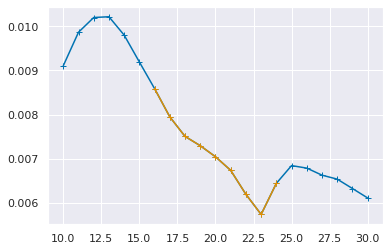

In [105]:
d = read_stieltjes_gammas('../h2o/core/CC-PVTZ/scr-fanoci-1s-mom-3spd/gamma.sh2.dat')
plt.plot(d['Order'], d['Gamma'], marker='+')
omin = 15
omax = 25
st_subset = d[(d['Order'] > omin) & (d['Order'] < omax)]
gamma = AU2EV * st_subset['Gamma'].mean()
print(gamma)
plt.plot(st_subset['Order'], st_subset['Gamma'], marker='+')

0.011237935208655101


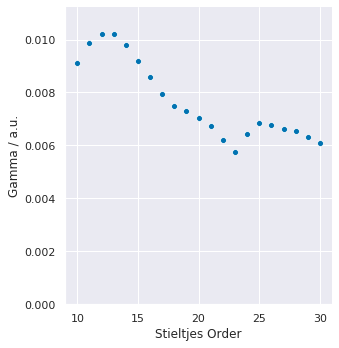

In [79]:
g = plot_stieltjes('../h2o/core/CC-PVTZ/scr-fanoci-1s-mom-3spd/gamma.sh2.dat')

In [75]:
d['Gamma'].max()

0.010216304735141